# k-means Clustering Football Postiton in Tackle Events

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
def loadFootballPos(weekNum):
    df = pd.read_csv(f'data/tracking_week_{weekNum}_filtered.csv')
    return df[df['displayName'] == 'football'][['x', 'y']]

df_w1_football_pos = loadFootballPos(1)
df_w2_football_pos = loadFootballPos(2)
df_w3_football_pos = loadFootballPos(3)
df_w4_football_pos = loadFootballPos(4)
df_w5_football_pos = loadFootballPos(5)
df_w6_football_pos = loadFootballPos(6)
df_w7_football_pos = loadFootballPos(7)
df_w8_football_pos = loadFootballPos(8)
df_w9_football_pos = loadFootballPos(9)

df = pd.concat([
    df_w1_football_pos,
    df_w2_football_pos,
    df_w2_football_pos,
    df_w2_football_pos,
    df_w2_football_pos,
    df_w2_football_pos,
    df_w2_football_pos,
    df_w2_football_pos,
    df_w2_football_pos
])

df.head()

,x,y
22,78.160004,36.650002
45,73.129997,42.470001
68,66.389999,40.419998
91,59.860001,47.490002
114,57.889999,22.760000


## k-means Clustering

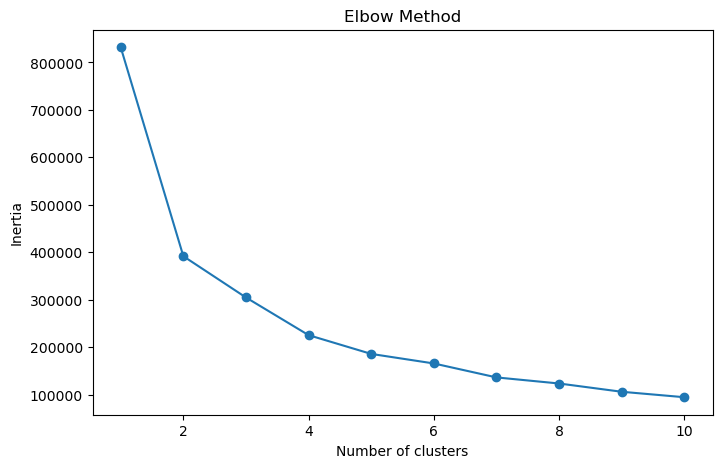

In [5]:
# https://www.statology.org/performing-cluster-analysis-in-python-a-step-by-step-tutorial/

# Determine optimal number of clusters (K) using the Elbow Method
def elbowMethod(df):
    inertia = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(df)
        inertia.append(kmeans.inertia_)

    # Plot the elbow method to decide on the best 'K'
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, 11), inertia, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()
elbowMethod(df_w1_football_pos)

In [6]:
# https://www.statology.org/performing-cluster-analysis-in-python-a-step-by-step-tutorial/

# Apply K-means with K=5
def kMeans(df):
    kmeans = KMeans(n_clusters=5, random_state=42)
    kmeans.fit(df)

    # Add the cluster identifiers as a new attribute in the original data
    df['Cluster'] = kmeans.labels_

    return kmeans

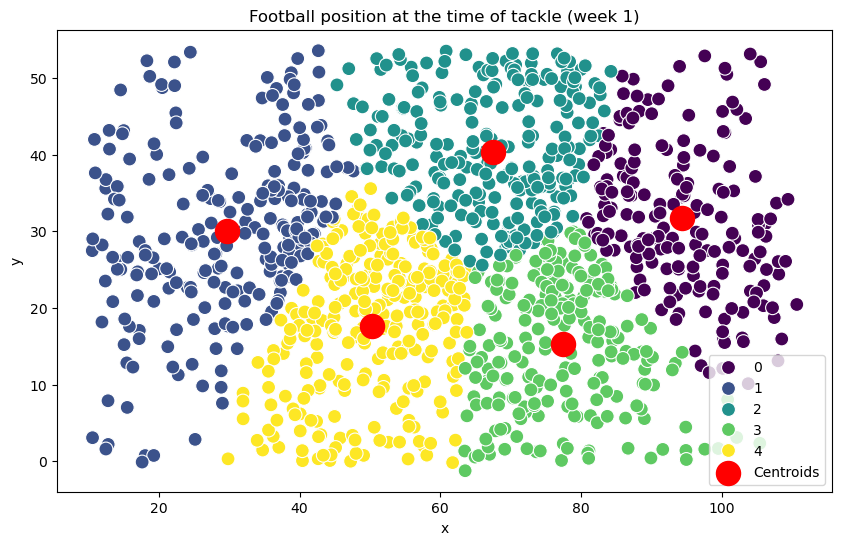

In [7]:
# https://www.statology.org/performing-cluster-analysis-in-python-a-step-by-step-tutorial/

# Visualize the clusters
def visualize(df, weekNum):
    kmeans = kMeans(df)
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df['x'], y=df['y'], hue=df['Cluster'], palette='viridis', s=100)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
    plt.title(f'Football position at the time of tackle (week {weekNum})')
    plt.legend()
    plt.show()
visualize(df_w1_football_pos, 1)

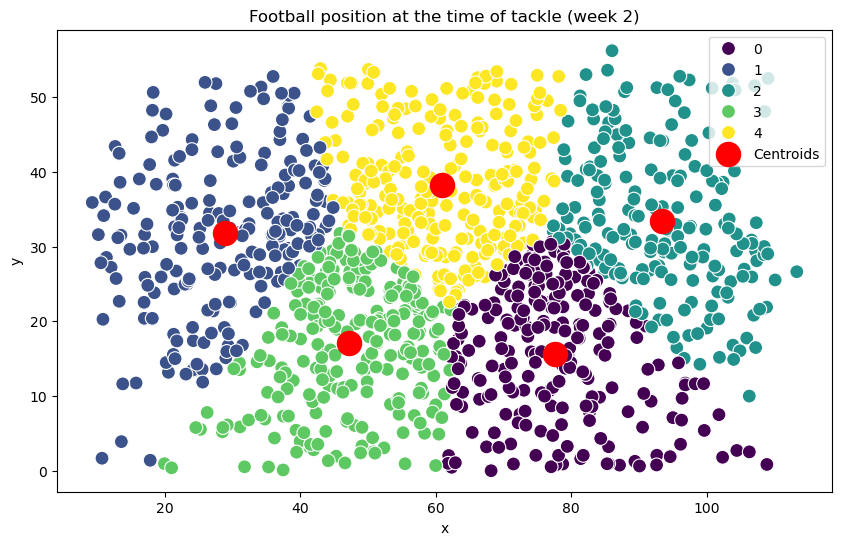

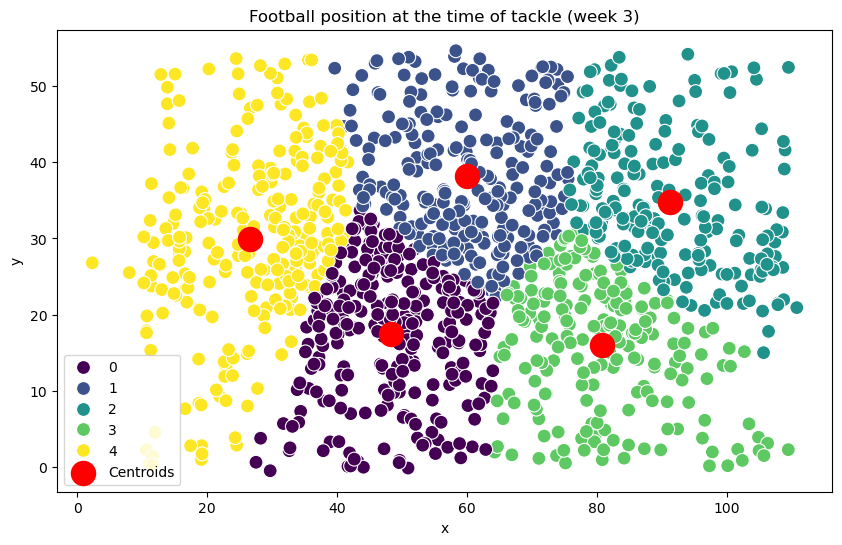

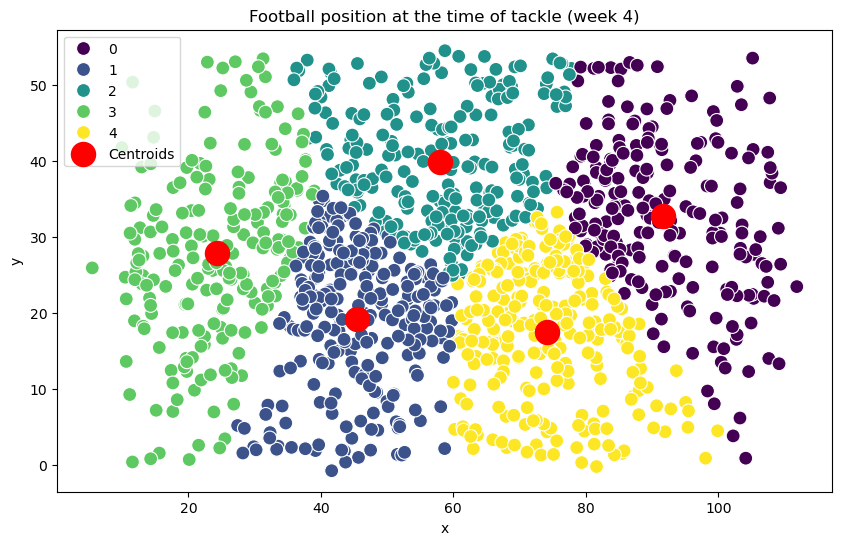

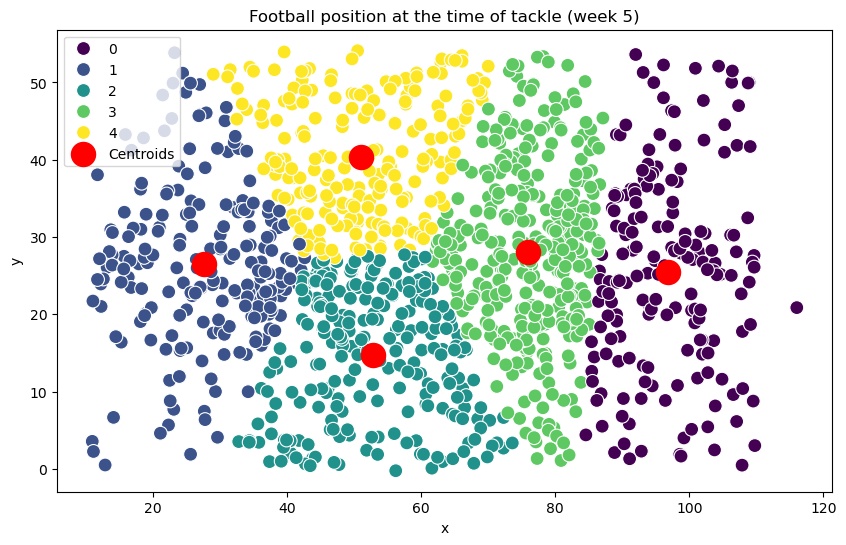

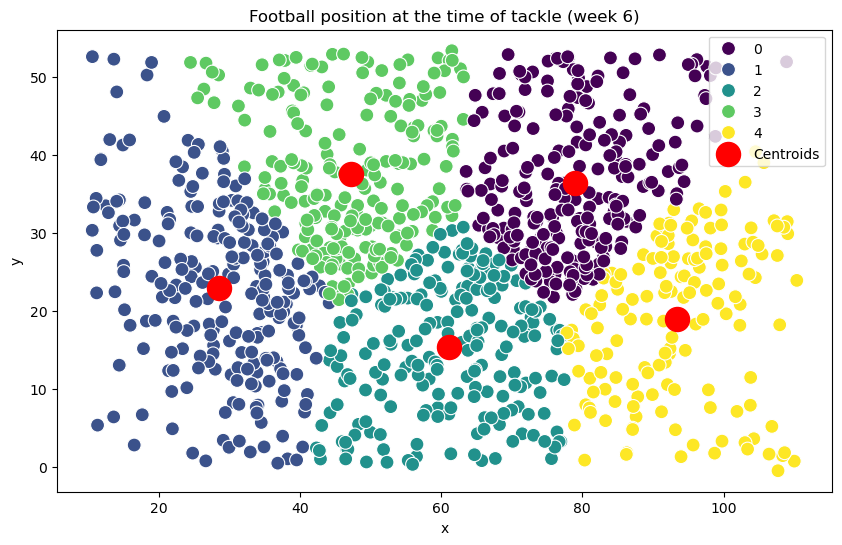

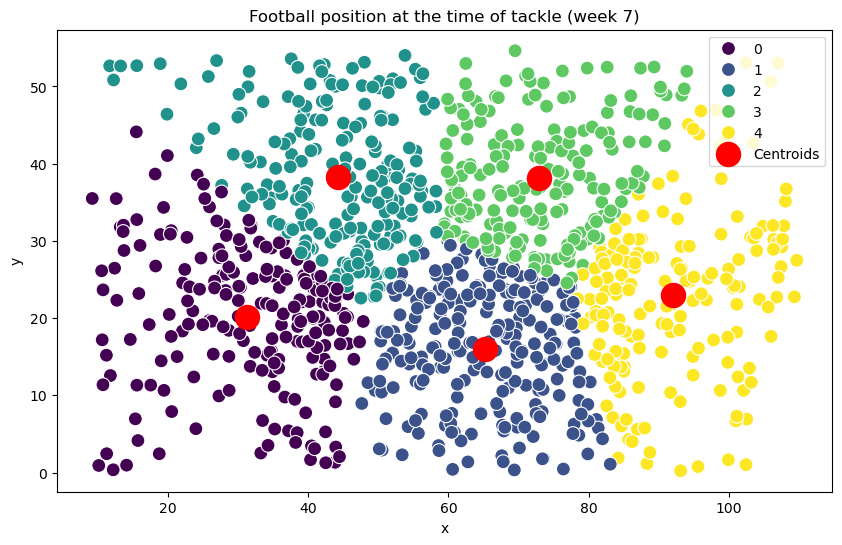

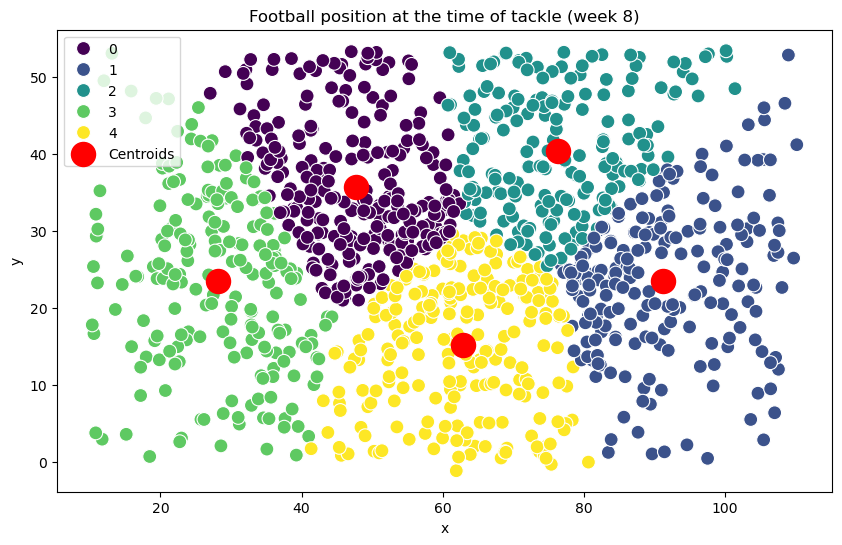

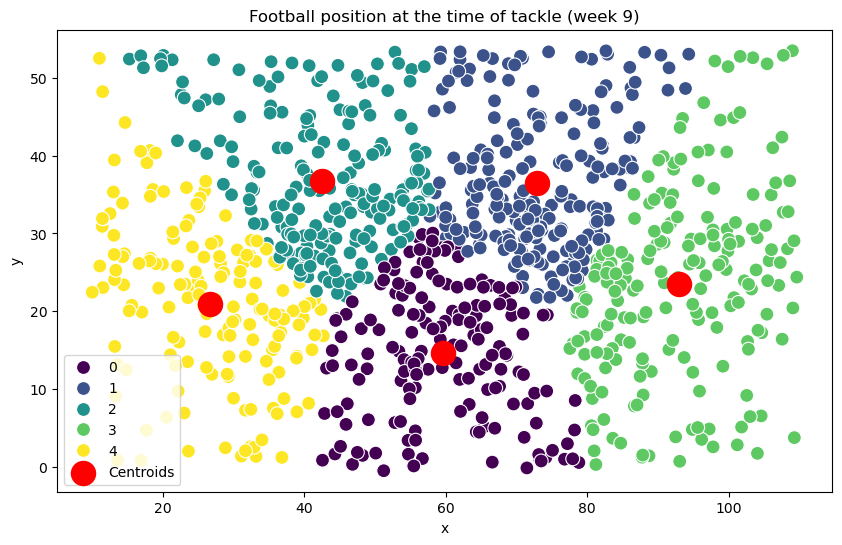

In [8]:
# Performs the same computation for weeks 2 - 9.

visualize(df_w2_football_pos, 2)
visualize(df_w3_football_pos, 3)
visualize(df_w4_football_pos, 4)
visualize(df_w5_football_pos, 5)
visualize(df_w6_football_pos, 6)
visualize(df_w7_football_pos, 7)
visualize(df_w8_football_pos, 8)
visualize(df_w9_football_pos, 9)

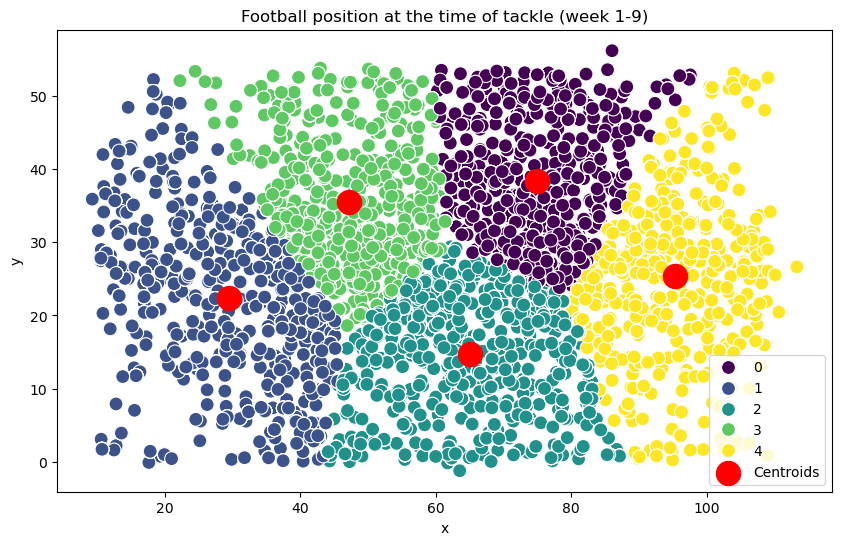

In [10]:
visualize(df, '1-9')

## Conclusion

k-means clustring revealed the football position at the time of tackle to be fairly randomly distributed throughout the football field. More tackles seem to occur closer to the center of the y-axis, which makes sense as a ball carrier can also go out of bounds to end a play.

## Future Work

Explore the coordinates of different players on the field by the position of player (e.g. cornerback or safety) and their involvement in making tackles. Would need to join with `players.csv` to get the position of each player.